<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_16836\214134000.py:6: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\ground_station_data.csv")


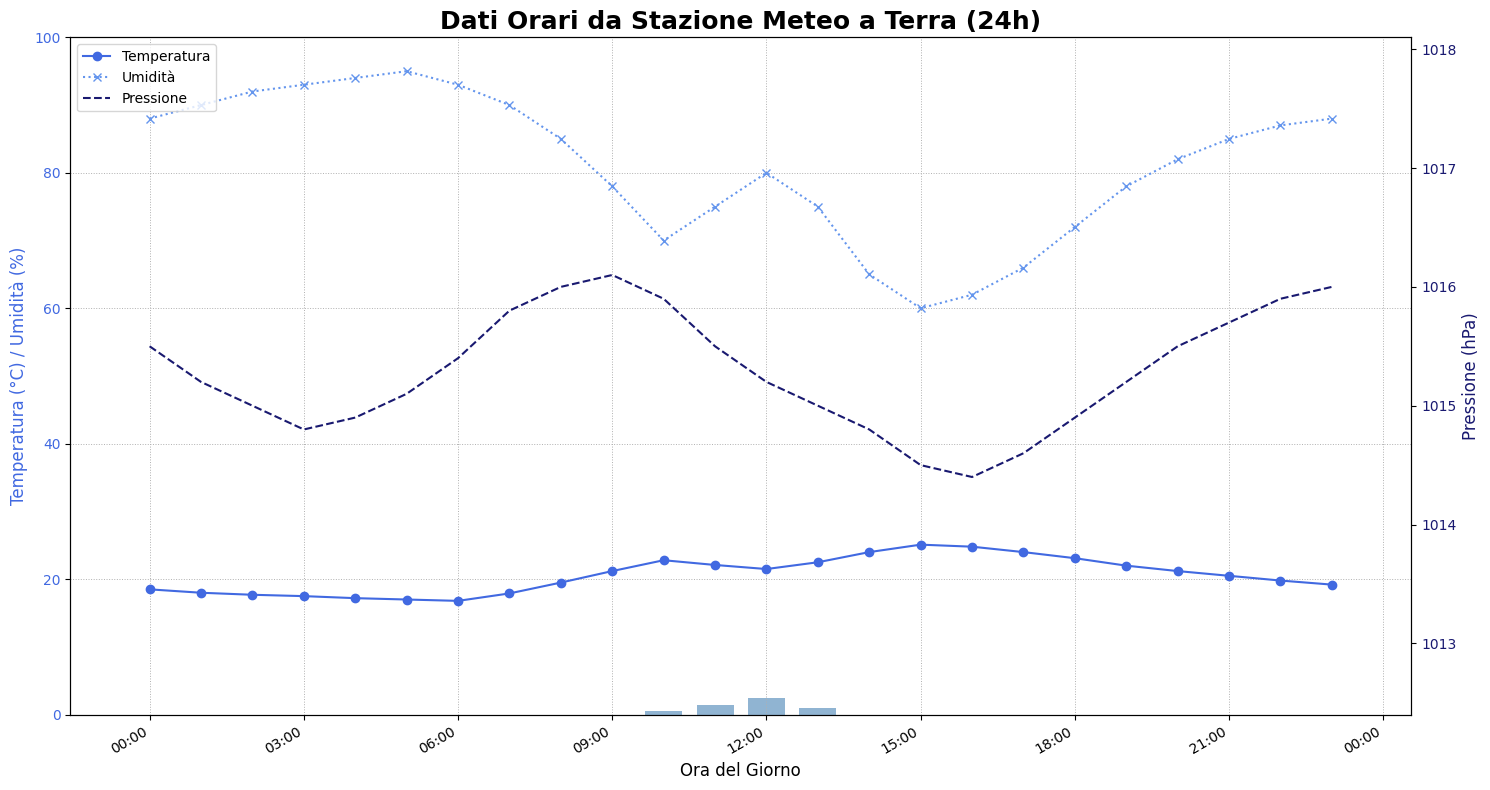

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

try:
    df = pd.read_csv("..\data\ground_station_data.csv")
except FileNotFoundError:
    print("Errore: File 'ground_station_data.csv' non trovato.")
    exit()

df['timestamp'] = pd.to_datetime(df['timestamp'])

fig, ax1 = plt.subplots(figsize=(15, 8))

color_temp = 'royalblue'
color_humi = 'cornflowerblue'
color_prec = 'steelblue'
color_pres = 'midnightblue'

ax1.set_title("Dati Orari da Stazione Meteo a Terra (24h)", fontsize=18, fontweight='bold')
ax1.set_xlabel('Ora del Giorno', fontsize=12)

ax1.set_ylabel('Temperatura (°C) / Umidità (%)', color=color_temp, fontsize=12)
line1 = ax1.plot(df['timestamp'], df['temperature_celsius'], color=color_temp, marker='o', linestyle='-', label='Temperatura')
line2 = ax1.plot(df['timestamp'], df['humidity_percent'], color=color_humi, marker='x', linestyle=':', label='Umidità')
ax1.tick_params(axis='y', labelcolor=color_temp)
ax1.set_ylim(0, 100)

bar1 = ax1.bar(df['timestamp'], df['precipitation_mm'], color=color_prec, alpha=0.6, width=0.03, label='Precipitazioni')

ax2 = ax1.twinx()
ax2.set_ylabel('Pressione (hPa)', color=color_pres, fontsize=12)
line3 = ax2.plot(df['timestamp'], df['pressure_hpa'], color=color_pres, linestyle='--', label='Pressione')
ax2.tick_params(axis='y', labelcolor=color_pres)
min_pres = df['pressure_hpa'].min()
max_pres = df['pressure_hpa'].max()
ax2.set_ylim(min_pres - 2, max_pres + 2)

ax1.grid(True, which='major', linestyle=':', linewidth=0.7)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()

lns = line1 + line2 + line3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

fig.tight_layout()
plt.savefig('grafico_stazione_terra_blu.png', dpi=300)
plt.show()